<a href="https://colab.research.google.com/github/dreamtx01/Springboard/blob/master/Capstone_ML_NCAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.model_selection

c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, 
                cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, 
               s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, 
               alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, 
                     cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, 
                           colorscale=colorscale, cdiscrete=cdiscrete, 
                           psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax 

print("Loaded")

Loaded


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
capstone = pd.read_csv("RegularSeasonDetailedResults.csv")
cap = pd.read_csv("TeamSpellings.csv",encoding="latin")

In [0]:

# The first thing to do is to associate TeamID to the name of the team. 
#This will help us put a name to the team
dic = {}
for i in range(0,len(cap["TeamID"])):
    dic[cap["TeamID"][i]]=cap['TeamNameSpelling'][i]
capstone["WTeamName"]=[dic[teamid] for teamid in capstone['WTeamID']]
capstone["LTeamName"]=[dic[teamid] for teamid in capstone['LTeamID']]

In [0]:
capstone['WTeamID'] = np.where(capstone['WScore']>=capstone['WScore'], 
                                           'W', 'L')
capstone['LTeamID'] = np.where(capstone['LScore']<=capstone['WScore'], 
                                            'L', "W")

In [0]:

result=pd.concat([capstone,capstone])


In [0]:
result.reset_index(inplace=True,drop=True)


In [7]:
result.WTeamID[82041:]=["L"]*82041


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
result=result.drop(columns=['LTeamID'])


In [9]:
result=result.rename(columns={"WTeamID": "Score"})
result

,Season,DayNum,Score,WScore,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WTeamName,LTeamName
0,2003,10,W,68,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,alabama,oklahoma
1,2003,10,W,70,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,memphis,syracuse
2,2003,11,W,73,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,marquette,villanova
3,2003,11,W,56,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,northern-illinois,winthrop
4,2003,11,W,77,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,texas,georgia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164077,2018,132,L,56,55,N,0,20,46,4,14,12,19,9,24,8,13,4,5,13,19,55,7,23,10,12,9,20,12,12,8,2,19,cincinnati,houston
164078,2018,132,L,58,57,N,0,19,50,6,18,14,16,6,26,9,12,4,4,14,20,52,8,23,9,17,11,26,12,14,3,4,16,davidson,rhode-island
164079,2018,132,L,74,61,N,0,25,56,8,17,16,20,8,23,9,8,12,5,21,17,57,4,25,23,28,19,24,9,13,1,5,16,georgia-state,ut-arlington
164080,2018,132,L,77,72,N,0,25,50,7,16,20,24,11,21,9,10,6,6,19,23,62,10,27,16,20,18,16,14,10,4,3,21,kentucky,tennessee


In [0]:
y = result['Score'] # Score

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = result[['WAst','LAst','WFGM','LFGM']].values
print("X: ", type(X), X.shape)

X:  <class 'numpy.ndarray'> (164082, 4)


In [13]:
# define the second parameter, investigate its type and shape
# and also compare its shape with that of the dataframe it comes from ...
y = (result.Score == "W").values

# notice that, by construction, y will have value True in positions where
# the value for the "Score" column of the dataframe is "Win", and False
# otherwise

print("y: ", type(y), y.shape)
print("result.Score shape: ", result.Score.shape)

y:  <class 'numpy.ndarray'> (164082,)
result.Score shape:  (164082,)


In [0]:
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, random_state=5)

In [15]:
# 
print("\n")
print("Xlr:", Xlr, type(Xlr), Xlr.shape, len(Xlr)) #TrainX


print("\n")
print("Xtestlr", Xtestlr, type(Xtestlr), Xtestlr.shape, len(Xtestlr)) #TestX

# 
print("\n")
print("ylr", ylr, type(ylr), ylr.shape, len(ylr)) #Trainy

# 
print("\n")
print("ytestlr", ytestlr, type(ytestlr), ytestlr.shape, len(ytestlr)) #Testy


# By default train_test_split splits to 75% train and 25% test
# Random state set to a fixed number will guarantee 
# that the output of Run 1 will be equal to the output of Run 2, 
# i.e. your split will be always the same



Xlr: [[13 10 31 28]
 [13 15 27 29]
 [11 13 25 26]
 ...
 [12 18 24 29]
 [17  5 28 12]
 [20  8 30 16]] <class 'numpy.ndarray'> (123061, 4) 123061


Xtestlr [[ 8  9 20 23]
 [17  7 21 16]
 [11 11 21 17]
 ...
 [11 14 20 23]
 [15  8 23 18]
 [15  6 24 22]] <class 'numpy.ndarray'> (41021, 4) 41021


ylr [False False False ...  True  True  True] <class 'numpy.ndarray'> (123061,) 123061


ytestlr [False  True  True ... False False  True] <class 'numpy.ndarray'> (41021,) 41021


In [16]:
# construct the LogisticRegression model
clf = LogisticRegression()

# Fit the model on the training data.
clf.fit(Xlr, ylr) 

# Print the accuracy from the testing data.
# AJS: introduce variable to be reused later
y_predict_test = clf.predict(Xtestlr)
print("\n")
print("[Test] Accuracy score (y_predict_test, ytestlr):",accuracy_score(y_predict_test, ytestlr))

# Note the order in which the parameters must be passed
# according to the documentation ... although there should be
# no difference since it is a one-to-one comparison ...
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
print("\n")
print("[Test] Accuracy score: (ytestlr, y_predict_test)",accuracy_score(ytestlr, y_predict_test))

# AJS: also printout the training score
y_predict_training = clf.predict(Xlr)
print("\n")
print("[Training] Accuracy score: (ylr, y_predict_training)",accuracy_score(ylr, y_predict_training))



[Test] Accuracy score (y_predict_test, ytestlr): 0.4957460812754443


[Test] Accuracy score: (ytestlr, y_predict_test) 0.4957460812754443


[Training] Accuracy score: (ylr, y_predict_training) 0.5014179959532264


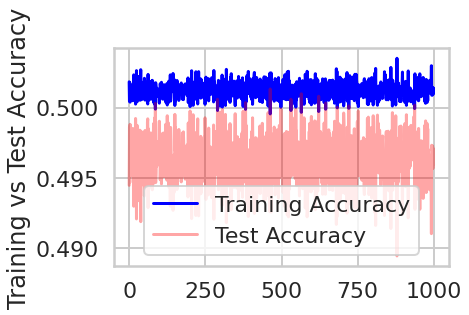

In [17]:
# we try multiple splits and see the effects, with the same proportion 75% train and 25% test

# keep lists for training accuracy, test accuracy, and the difference
# between the latter and the former
training_accuracy = []
test_accuracy = []
accuracy_difference = []

# define number of trials
n_splits = 1000

# define LogisticRegression object
clf = LogisticRegression()

# loop over multiple trials
for i in range(0, n_splits):
    # do split for this iteration, using shuffle and a different random_state 
    # for every iteration
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(result[['WAst','LAst','WFGM','LFGM']].values, 
                                              (result.Score == "W").values,random_state=i)
    # fit on the training set
    clf.fit(Xlr, ylr)
    
    # predict on training set
    y_predict_training = clf.predict(Xlr)
    
    # predict on test set
    y_predict_test = clf.predict(Xtestlr)
    
    # save training accuracy for this split
    tr_accuracy = accuracy_score(y_predict_training, ylr)
    training_accuracy.append(tr_accuracy)
    
    # save test accuracy for this split
    tst_accuracy = accuracy_score(y_predict_test, ytestlr)
    test_accuracy.append(tst_accuracy)
    
    # save difference
    accuracy_difference.append(tst_accuracy - tr_accuracy)
#end for
#
# plot both curves
# ref: https://matplotlib.org/users/pyplot_tutorial.html
# parameter alpha below is a percentage of transparency
# ref: https://matplotlib.org/users/legend_guide.html
training_plot, = plt.plot(training_accuracy, 'b')
test_plot, = plt.plot(test_accuracy, 'r', alpha = 0.35)
plt.legend([training_plot, test_plot], ['Training Accuracy', 'Test Accuracy'])
plt.ylabel('Training vs Test Accuracy')
plt.show()

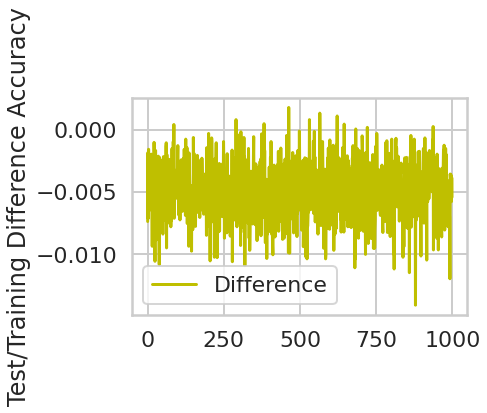

In [18]:
#  show accuracy difference plot
diff_plot, = plt.plot(accuracy_difference, 'y')
plt.legend([diff_plot], ['Difference'])
plt.ylabel('Test/Training Difference Accuracy')
plt.show()

In [19]:
# use sklearn.metrics.classification_report for a more comprehensive
# performance analysis


from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report]")
print(classification_report(ylr, y_predict_training))

print("[Test Classification Report]")
print(classification_report(ytestlr, y_predict_test))

[Training Classification Report]
              precision    recall  f1-score   support

       False       0.50      0.66      0.57     61615
        True       0.50      0.34      0.41     61446

    accuracy                           0.50    123061
   macro avg       0.50      0.50      0.49    123061
weighted avg       0.50      0.50      0.49    123061

[Test Classification Report]
              precision    recall  f1-score   support

       False       0.50      0.65      0.56     20426
        True       0.50      0.34      0.41     20595

    accuracy                           0.50     41021
   macro avg       0.50      0.50      0.48     41021
weighted avg       0.50      0.50      0.48     41021



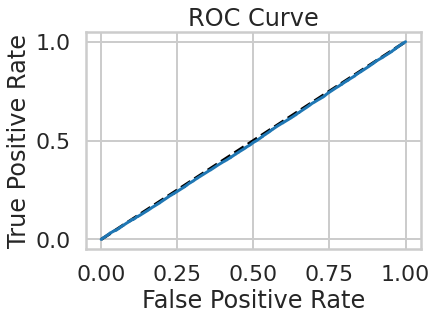

In [20]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(Xtestlr)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(ytestlr, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [23]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(Xtestlr)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(ytestlr, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(clf,X,y,cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.4942756444802663
AUC scores computed using 5-fold cross-validation: [0.49998582 0.49998433 0.5        0.5        0.5       ]


In [25]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}



# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

Tuned Logistic Regression Parameters: {'C': 1e-05, 'penalty': 'l2'}
Best score is 0.49999390559770857


In [26]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9844.777826942964, tolerance: 1.968974298810244
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9844.768945466616, tolerance: 1.9689737401440188
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9844.786480770568, tolerance: 1.9689675694205713
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9844.83543

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.034482758620689655}
Tuned ElasticNet R squared: -5.8035971584047275e-09
Tuned ElasticNet MSE: 0.2500000009285777
